In [3]:
import math
import numpy as np 
import matplotlib.pyplot as plt
#正規分布を定義

def normal_distribution(x,mu,sigma):
      Y = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
      return Y

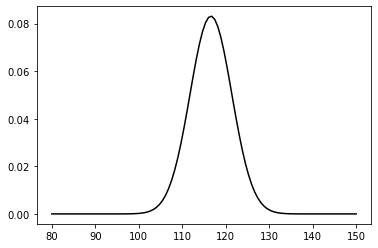

In [4]:
#正規分布のパラメータ設定
mu = 116.6
sigma = 4.8

#描画パラメータの設定
X_min = 80
X_max = 150
X_num = 100

#正規分布の計算
X = np.linspace(X_min,X_max,X_num)
Y = normal_distribution(X,mu,sigma)

#正規分布の描画
plt.plot(X,Y,color="k")
plt.show()
%matplotlib inline

In [5]:
#積分範囲の設定
X_min = 115
X_max = 117
x_num = 100

#積分範囲における製k分布の値の計算
X = np.linspace(X_min,X_max,X_num)
Y = normal_distribution(X,mu,sigma)

#積分の計算
dx = (X_max-X_min)/(X_num-1)
prob = 0
for i in range(X_num):
    Y = normal_distribution(X[i],mu,sigma)
    prob += Y*dx
print("確率:",prob)

確率: 0.1653959487393015


テイラー展開
21*x/10 + 21/10


(0.0, 10.0)

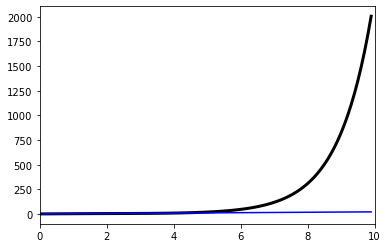

In [9]:
from sympy import*
import numpy as np
from matplotlib import pyplot as plt

#パラメータを設定
n=1 #次数
x0=0 #初期値

#シンボルを定義
x=Symbol('x')

#関数を定義
f=2+x+sin(x)+exp(x)/10

#テイラー展開を導出
taylor = series(f,x=x,x0=x0,n=n+1).removeO()
taylor_y=lambdify(x,taylor,'numpy')
print('テイラー展開')
print(taylor)

#描画
x_theory=np.arange(0.0,10.0,0.1)
y_theory=2+x_theory+np.sin(x_theory)+np.exp(x_theory)/10
plt.plot(x_theory,y_theory,lw=3,c="k")
plt.plot(x_theory,taylor_y(x_theory),c='b')
plt.xlim([0,10])

テイラー展開
x**20/24329020081766400000 - x**19/135161222676480000 + x**18/64023737057280000 + x**17/323352207360000 + x**16/209227898880000 - x**15/1452971520000 + x**14/871782912000 + x**13/5660928000 + x**12/4790016000 - x**11/44352000 + x**10/36288000 + 11*x**9/3628800 + x**8/403200 - x**7/5600 + x**6/7200 + 11*x**5/1200 + x**4/240 - 3*x**3/20 + x**2/20 + 21*x/10 + 21/10


(0.0, 10.0)

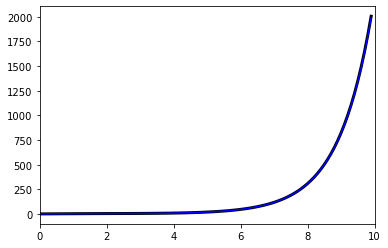

In [10]:
from sympy import*
import numpy as np
from matplotlib import pyplot as plt

#パラメータを設定
n=20 #次数
x0=0 #初期値

#シンボルを定義
x=Symbol('x')

#関数を定義
f=2+x+sin(x)+exp(x)/10

#テイラー展開を導出
taylor = series(f,x=x,x0=x0,n=n+1).removeO()
taylor_y=lambdify(x,taylor,'numpy')
print('テイラー展開')
print(taylor)

#描画
x_theory=np.arange(0.0,10.0,0.1)
y_theory=2+x_theory+np.sin(x_theory)+np.exp(x_theory)/10
plt.plot(x_theory,y_theory,lw=3,c="k")
plt.plot(x_theory,taylor_y(x_theory),c='b')
plt.xlim([0,10])

In [11]:
def function(x):
    y=x**2
    return y
def differential(x,dx):
    dy=(function(x+dx)-function(x))/dx
    return dy


In [16]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import animation,rc
from IPython.display import HTML

#関数生成
x_list=np.arange(-10,11)
y_list=function(x_list)
num=len(x_list)

#パラメータ設定
dx=0.1 #刻み幅
iter=200#繰り返し回数

#初期値設定
x=-10

#繰り返し処理
list_plot=[]
fig=plt.figure()
for t in range(iter):
    #導関数を導出
    dy=differential(x,dx)
    #x,yを更新
    x=x-np.sign(dy)*dx
    y=function(x)
    #グラフを描画
    img=plt.plot(x,y,marker='.',color="red",markersize=20)
    img +=plt.plot(x_list,y_list,color="black")
    list_plot.append(img)
    
#グラフ（アニメーション）描画
plt.grid()
anim=animation.ArtistAnimation(fig,list_plot,interval=200,repeat_delay=100)
rc('animation',html='jshtml')
plt.close()
anim